# Pyber Data Analysis
* There are more drivers and rides taken in urban cities than in suburban or rural cities.
* The average ride fare is higher in rural cities than in urban or suburban cities.
* Urban cities have the greatest amount of total fares when compared to suburban or rural cities.



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "05-Matplotlib_Homework_Instructions_Pyber_data_city_data.csv"
ride_data_to_load = "05-Matplotlib_Homework_Instructions_Pyber_data_ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
pyber_data.head()

pyber_data_clean = pyber_data.drop_duplicates(subset = ["city"])

## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Only grab data for urban cities
total_number_rides_urban = pyber_data.loc[pyber_data["type"]=="Urban"]

# Count the total number of urban city rides
total_number_rides_urban = total_number_rides_urban["city"].value_counts()

# Set index to "city"
pyber_data_city_index = pyber_data.set_index("city")

# Only grab data for urban cities
average_city_fare_urban = pyber_data_city_index.loc[pyber_data_city_index["type"]=="Urban"]

# Find the average fare for urban cities
average_city_fare_urban = round(average_city_fare_urban.groupby(level=0).mean(), 2)

# Delete unnecessary columns
del average_city_fare_urban["ride_id"]

del average_city_fare_urban["driver_count"]

# Only grab data for urban cities
driver_count_urban = pyber_data_clean.loc[pyber_data_clean["type"]=="Urban"]

# Set index to "city"
driver_count_urban = driver_count_urban.set_index("city")

# Delete unnecessary columns
del driver_count_urban["date"]

del driver_count_urban["fare"]

del driver_count_urban["ride_id"]

del driver_count_urban["type"]

# Only grab data for suburban cities
total_number_rides_suburban = pyber_data.loc[pyber_data["type"]=="Suburban"]

# Count the total number of suburban city rides
total_number_rides_suburban = total_number_rides_suburban["city"].value_counts()

# Only grab data for suburban cities
average_city_fare_suburban = pyber_data_city_index.loc[pyber_data_city_index["type"]=="Suburban"]

# Find the average fare for suburban cities
average_city_fare_suburban = round(average_city_fare_suburban.groupby(level=0).mean(), 2)

# Delete unnecessary columns
del average_city_fare_suburban["ride_id"]

del average_city_fare_suburban["driver_count"]

# Only grab data for suburban cities
driver_count_suburban = pyber_data_clean.loc[pyber_data_clean["type"]=="Suburban"]

# Set index to "city"
driver_count_suburban = driver_count_suburban.set_index("city")

# Delete unnecessary columns
del driver_count_suburban["date"]

del driver_count_suburban["fare"]

del driver_count_suburban["ride_id"]

del driver_count_suburban["type"]

# Only grab data for rural cities
total_number_rides_rural = pyber_data.loc[pyber_data["type"]=="Rural"]

# Count the total number of rural city rides
total_number_rides_rural = total_number_rides_rural["city"].value_counts()

# Only grab data for rural cities
average_city_fare_rural = pyber_data_city_index.loc[pyber_data_city_index["type"]=="Rural"]

# Find the average fare for rural cities
average_city_fare_rural = round(average_city_fare_rural.groupby(level=0).mean(), 2)

# Delete unnecessary columns
del average_city_fare_rural["ride_id"]

del average_city_fare_rural["driver_count"]

# Only grab data for rural cities
driver_count_rural = pyber_data_clean.loc[pyber_data_clean["type"]=="Rural"]

# Set index to "city"
driver_count_rural = driver_count_rural.set_index("city")

# Delete unnecessary columns
del driver_count_rural["date"]

del driver_count_rural["fare"]

del driver_count_rural["ride_id"]

del driver_count_rural["type"]

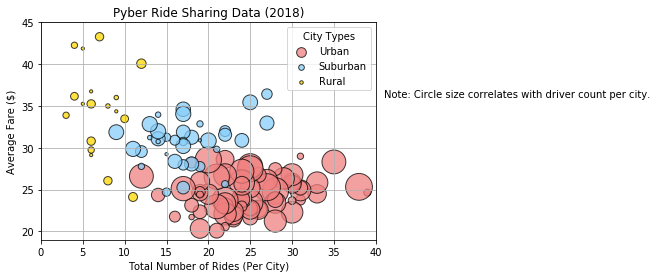

In [3]:
# Build the scatter plots for each city types
scatter_plot_urban = plt.scatter(total_number_rides_urban, average_city_fare_urban, marker="o", facecolors="lightcoral", edgecolors="black", linewidths=1, 
                        s=driver_count_urban*10, alpha=0.75, label="Urban")

scatter_plot_suburban = plt.scatter(total_number_rides_suburban, average_city_fare_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", linewidths=1,
                        s=driver_count_suburban*10, alpha=0.75, label="Suburban")

scatter_plot_rural = plt.scatter(total_number_rides_rural, average_city_fare_rural, marker="o", facecolors="gold", edgecolors="black", linewidths=1, 
                        s=driver_count_rural*10, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.ylim(19, 45)
plt.xlim(0, 40)
plt.grid()

plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(handles=[scatter_plot_urban, scatter_plot_suburban, scatter_plot_rural], loc="best", markerscale=0.5, 
            title="City Types")

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.62, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberDataBubblePlot.png")

# Show plot
plt.show()

## Total Fares by City Type

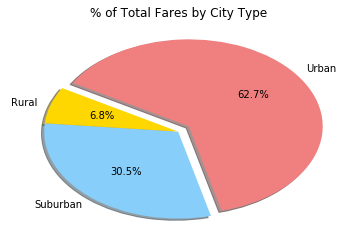

In [4]:
# Calculate Type Percents
pyber_data_urban = pyber_data.loc[pyber_data["type"]=="Urban"]
total_fares_urban = round(pyber_data_urban["fare"].sum(), 2)

pyber_data_suburban = pyber_data.loc[pyber_data["type"]=="Suburban"]
total_fares_suburban = round(pyber_data_suburban["fare"].sum(), 2)

pyber_data_rural = pyber_data.loc[pyber_data["type"]=="Rural"]
total_fares_rural = round(pyber_data_rural["fare"].sum(), 2)

# Build Pie Chart
city_type = ["Urban", "Suburban", "Rural"]
total_fares = [total_fares_urban, total_fares_suburban, total_fares_rural]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(total_fares, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150, counterclock=False)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresPieChart.png")

# Show Figure
plt.show()



## Total Rides by City Type

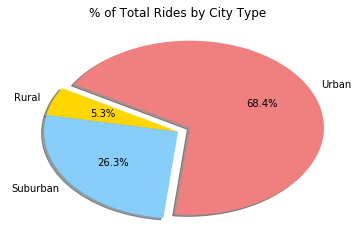

In [5]:
# Calculate Ride Percents
total_rides_urban = len(pyber_data_urban.index)
total_rides_suburban = len(pyber_data_suburban.index)
total_rides_rural = len(pyber_data_rural.index)

# Build Pie Chart
city_type = ["Urban", "Suburban", "Rural"]
total_rides = [total_rides_urban, total_rides_suburban, total_rides_rural]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(total_rides, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150, counterclock=False)

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("TotalRidesPieChart.png")

# Show Figure
plt.show()

## Total Drivers by City Type

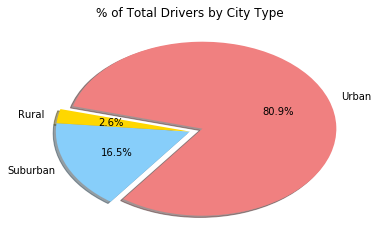

In [6]:
# Calculate Driver Percents
pyber_data_clean_urban = pyber_data_clean.loc[pyber_data_clean["type"]=="Urban"]
total_drivers_urban = pyber_data_clean_urban["driver_count"].sum()

pyber_data_clean_suburban = pyber_data_clean.loc[pyber_data_clean["type"]=="Suburban"]
total_drivers_suburban = pyber_data_clean_suburban["driver_count"].sum()

pyber_data_clean_rural = pyber_data_clean.loc[pyber_data_clean["type"]=="Rural"]
total_drivers_rural = pyber_data_clean_rural["driver_count"].sum()

# Build Pie Charts
city_type = ["Urban", "Suburban", "Rural"]
total_drivers = [total_drivers_urban, total_drivers_suburban, total_drivers_rural]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=165, counterclock=False)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversPieChart.png")

# Show Figure
plt.show()